   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')
Accuracy: 96.59%


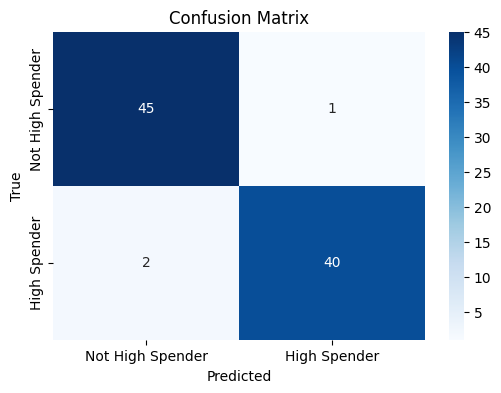

Model coefficients: [[ 0.63419831 -0.06192862  0.05760555  0.67879038  5.82854522  0.23923191
   1.35709745  0.64374015]]


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('customers.csv')

# Check the first few rows and the column names
print(data.head())
print(data.columns)

# Check if there is any column that can be used as a target for binary classification.
# Let's assume we create a new column (e.g., 'High_spender') based on one of the numerical features
# For example, using 'Grocery' spending above a threshold to create a binary target
data['High_spender'] = (data['Grocery'] > data['Grocery'].median()).astype(int)

# Now, use 'High_spender' as the target variable
target_column = 'High_spender'

# Features
X = data.drop(columns=[target_column])
y = data[target_column]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not High Spender', 'High Spender'], yticklabels=['Not High Spender', 'High Spender'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display the model's coefficients (optional)
print("Model coefficients:", model.coef_)
